# PCA

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(return_X_y = False)

X_iris = iris.data
y_iris = iris.target

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_iris.shape

(150, 4)

In [ ]:
transformacion = PCA(n_components=2)
transformacion.fit(X_iris)

PCA()

In [ ]:
transformacion.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [ ]:
transformacion.components_[2]

array([-0.58202985,  0.59791083,  0.07623608,  0.54583143])

In [ ]:
X_iris_transform = transformacion.transform(X_iris)

In [ ]:
X_iris_transform

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
np.dot(X_iris, transformacion.components_.T)

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [ ]:
X_iris_transform.shape

(150, 2)

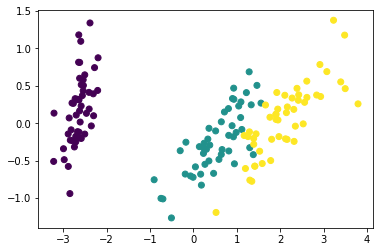

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_iris_transform[:,0], X_iris_transform[:,1], c=y_iris)

Circulo de correlación de pca

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079,0.061259


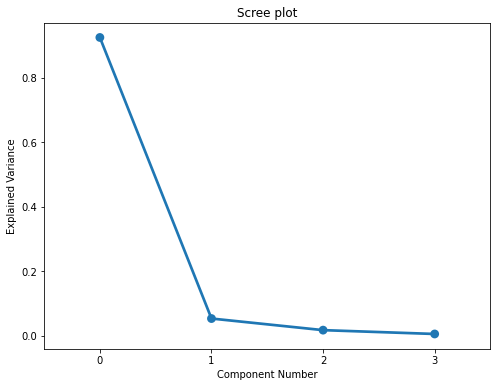

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


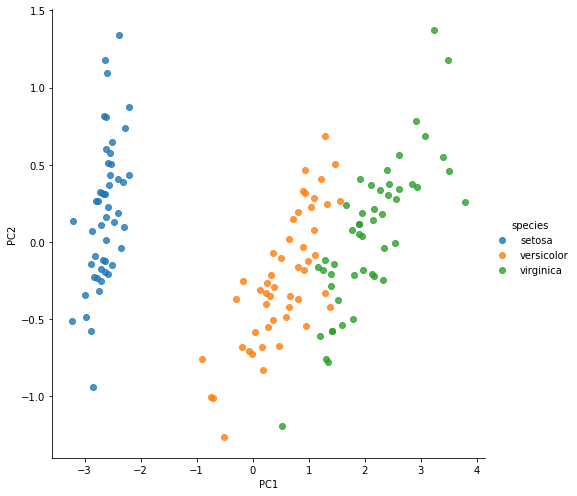

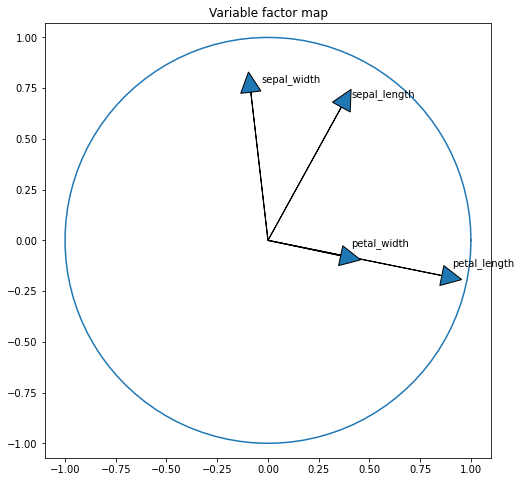

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

n_components = 4

# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width']])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='species',data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [ ]:
transformacion.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
transformacion.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
transformacion.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
sum(transformacion.explained_variance_ratio_[:1])

0.9246187232017271

In [ ]:
transformacion.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521])

In [ ]:
dato_a_transformar = np.random.normal(loc=0.0, scale=1.0, size=4)
dato_a_transformar

array([ 0.31191167,  0.8552271 , -0.88451245, -0.1661367 ])

In [ ]:
dato_a_transformar.shape

(4,)

In [ ]:
transformacion.transform([dato_a_transformar])

array([[-6.27919118, -4.33181058]])

Wine

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine(return_X_y = False)

X_wine = wine.data
y_wine = wine.target

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_wine.shape

(178, 13)

In [ ]:
transformacion = PCA()
transformacion.fit(X_wine)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformacion.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

In [ ]:
transformacion.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [ ]:
sum(transformacion.explained_variance_ratio_[:1])

0.9980912304918974

In [ ]:
np.random.normal(loc=0.0, scale=1.0, size=13)

array([-1.04564417,  0.62593305, -0.26864833,  2.31023502, -0.74223288,
        0.59095289,  0.11844691, -1.00873418,  1.43763316, -2.07082773,
       -0.97795024,  0.3805715 , -0.49629945])

In [ ]:
dato_a_transformar = np.random.normal(loc=0.0, scale=1.0, size=13)

In [ ]:
dato_a_transformar.shape

(13,)

In [ ]:
transformacion.transform(dato_a_transformar)

ValueError: ignored

In [ ]:
np.array([dato_a_transformar]).shape

(1, 13)

In [ ]:
dato_a_transformar.reshape([1,-1]).shape

(1, 13)

In [ ]:
dato_a_transformar[np.newaxis, :].shape

(1, 13)

In [ ]:
transformacion.transform([dato_a_transformar])

array([[-7.48613617e+02, -8.44075119e+01,  2.15346898e+01,
        -4.18245565e+00, -2.55880507e+00, -3.67974407e+00,
         9.91545514e+00,  2.83624657e+00, -1.78622746e+00,
        -2.77508288e+00, -5.82936070e-01, -3.78277069e+00,
        -7.60742171e-01]])

# Pipelines de ejecución

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_wine

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
wine = load_wine(return_X_y = False)

X_wine = wine.data
y_wine = wine.target

X_wine.shape

(178, 13)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA()),
    ('clf', RandomForestClassifier())
])

In [ ]:
parameters = {
    'scaler__feature_range': ((0,1), (-5,5)),      # Tamaño máximo del vocabulario (1000 y 2000).
    'pca__n_components': (2, 5, 10),   # Unigramas y unigramas + bigramas.
    'pca__svd_solver': ("full", "randomized"),         # Usar o no frecuencia inversa del documento.
    'clf__n_estimators': [50, 100],          # Número de árboles del Random Forest (50 y 100).
    'clf__max_features': [0.1, 0.3]          # Porcentaje de características del Random Forest (10% y 30%).
}

In [ ]:
grid_cv = GridSearchCV(pipeline, param_grid = parameters, verbose=2)
grid_cv.fit(X_wine, y_wine)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.2s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.2s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.2s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.2s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(-5, 5); total time=   0.2s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_features': [0.1, 0.3],
                         'clf__n_estimators': [50, 100],
                         'pca__n_components': (2, 5, 10),
                         'pca__svd_solver': ('full', 'randomized'),
                         'scaler__feature_range': ((0, 1), (-5, 5))},
             verbose=2)

In [ ]:
grid_cv.best_params_

{'clf__max_features': 0.1,
 'clf__n_estimators': 50,
 'pca__n_components': 10,
 'pca__svd_solver': 'randomized',
 'scaler__feature_range': (-5, 5)}

In [ ]:
grid_cv.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-5, 5))),
                ('pca', PCA(n_components=10, svd_solver='randomized')),
                ('clf',
                 RandomForestClassifier(max_features=0.1, n_estimators=50))])

In [ ]:
estimtadores = [('Paso_Uno_Inventado', Paso1()), ('Paso2', Paso2()), ('Paso3', Paso3())]

In [ ]:
# Pipeline con los tres estimadores a utilizar.

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

In [ ]:
parameters = {
    'vect__max_features': (1000, 2000),      # Tamaño máximo del vocabulario (1000 y 2000).
    'vect__ngram_range': ((1, 1), (1, 2)),   # Unigramas y unigramas + bigramas.
    'tfidf__use_idf': (True, False),         # Usar o no frecuencia inversa del documento.
    'clf__n_estimators': [50, 100],          # Número de árboles del Random Forest (50 y 100).
    'clf__max_features': [0.1, 0.3]          # Porcentaje de características del Random Forest (10% y 30%).
}

In [ ]:
grid_cv = GridSearchCV(pipeline, param_grid = parameters, verbose=2)
grid_cv.fit(X, y)
grid_cv.best_params_()

In [ ]:
X, y
count = CountVectorizer(max_features=1000, ngram_range=(1, 1))
X_transform_vectorizer = count.fit_transform(X)
transformer = TfidfTransformer(use_idf=True)
X_tfidf_count = transformer.fit_transfomr(X_transform_vectorizer)
clf = RandomForestClassifier(n_estimators=50,max_features=0.1)
clf.fit(X_tfidf_count, y)
#y_pred = clf.predict(X_tfidf_count)
clf.score(X_tfidf_count, y )


count = CountVectorizer(max_features=2000, ngram_range=(1, 1))
X_transform_vectorizer = count.fit_transform(X)
transformer = TfidfTransformer(use_idf=True)
X_tfidf_count = transformer.fit_transfomr(X_transform_vectorizer)
clf = RandomForestClassifier(n_estimators=50,max_features=0.3)
clf.fit(X_tfidf_count, y)
#y_pred = clf.predict(X_tfidf_count)
clf.score(X_tfidf_count, y )

count = CountVectorizer(max_features=1000, ngram_range=(1, 1))
X_transform_vectorizer = count.fit_transform(X)
transformer = TfidfTransformer(use_idf=True)
X_tfidf_count = transformer.fit_transfomr(X_transform_vectorizer)
clf = RandomForestClassifier(n_estimators=200,max_features=0.1)
clf.fit(X_tfidf_count, y)
#y_pred = clf.predict(X_tfidf_count)
clf.score(X_tfidf_count, y )

count = CountVectorizer(max_features=2000, ngram_range=(1, 1))
X_transform_vectorizer = count.fit_transform(X)
transformer = TfidfTransformer(use_idf=True)
X_tfidf_count = transformer.fit_transfomr(X_transform_vectorizer)
clf = RandomForestClassifier(n_estimators=200,max_features=0.3)
clf.fit(X_tfidf_count, y)
#y_pred = clf.predict(X_tfidf_count)
clf.score(X_tfidf_count, y )



count = CountVectorizer(max_features=2000, ngram_range=(1, 1))
X_transform_vectorizer = count.fit_transform(X)
transformer = TfidfTransformer(use_idf=True)
X_tfidf_count = transformer.fit_transfomr(X_transform_vectorizer)
clf = RandomForestClassifier(n_estimators=100,max_features=0.3)
clf.fit(X_tfidf_count, y)
#y_pred = clf.predict(X_tfidf_count)
clf.score(X_tfidf_count, y )

# Guardando objetos de python

In [2]:
import pickle
diccionario = {"clave": "valor"}

descriptor_archivo = open("diccionar.pkl","wb")
pickle.dump(diccionario, descriptor_archivo,  protocol=pickle.HIGHEST_PROTOCOL)
descriptor_archivo.close()

#with open("diccionar.pkl","wb") as descriptor_archivo:
#  pickle.dump(diccionario, descriptor_archivo,  protocol=pickle.HIGHEST_PROTOCOL)


In [3]:
import pickle
diccionario2 = pickle.load(open("diccionar.pkl", "rb"))
diccionario2

{'clave': 'valor'}

# Guardar modelo entrenado

In [8]:
from sklearn import svm
from sklearn import datasets

In [9]:
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
clf.fit(X, y)

SVC()

In [10]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Guardar modelo

In [7]:
import pickle

In [8]:
with open('modelo_preentrenado.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Cargar el modelo

In [1]:
clf2

NameError: ignored

In [2]:
import pickle
from sklearn import datasets

In [3]:
with open('modelo_preentrenado.pickle', 'rb') as handle:
    clf2 = pickle.load(handle)

In [4]:
X, y = datasets.load_iris(return_X_y=True)

In [5]:
clf2.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Joblib

### Guardar el modelo

In [6]:
from joblib import dump

In [11]:
dump(clf, 'model_preentrenado.joblib')

['model_preentrenado.joblib']

### Cargar el modelo

In [1]:
from joblib import  load
from sklearn import datasets

In [2]:
clf2 = load('model_preentrenado.joblib')

In [3]:
X, y = datasets.load_iris(return_X_y=True)

In [4]:
clf2.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Reducción de dimensionalidad

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

(1257, 64)


In [ ]:
pca = PCA(n_components= 40)

Recuerde siempre que el proceso de ajuste de PCA se debe hacer sobre los datos de entrenamiento.

In [ ]:
pca.fit(X_train)
print(pca.components_.shape)
pca.components_

(40, 64)


array([[ 1.38777878e-17, -1.92284745e-02, -2.31353281e-01, ...,
        -5.97817610e-02, -2.88971396e-02, -1.30482929e-02],
       [-1.11022302e-16, -6.92799856e-03, -3.11895842e-03, ...,
         1.49083972e-01,  7.79694866e-03, -8.54606032e-03],
       [-2.77555756e-16,  1.82334270e-02,  1.18472543e-01, ...,
         2.48031486e-01,  1.70977160e-01,  3.44515113e-02],
       ...,
       [ 5.38004747e-17, -5.14729579e-03, -1.08607970e-01, ...,
         2.50731638e-01, -1.07920158e-01, -1.84439907e-01],
       [-1.79472769e-16, -2.53059432e-02, -1.39228357e-02, ...,
         4.87883685e-02,  5.65143172e-02,  7.20888141e-02],
       [-1.49281981e-16, -6.96892333e-02,  5.16240612e-02, ...,
        -1.56412418e-02, -7.09388926e-02,  1.88875050e-02]])

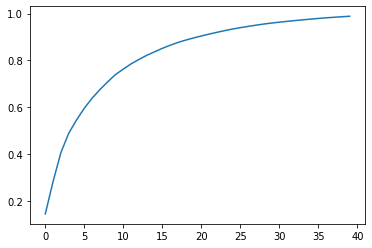

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_) > 0.9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.9)

20

In [ ]:
X_train_transform = pca.transform(X_train)
X_train_transform.shape

(1257, 40)

In [ ]:
pca = PCA(n_components= 20)

In [ ]:
X_train_transform = pca.fit_transform(X_train)
X_train_transform.shape

(1257, 20)

In [ ]:
clf = svm.SVC()
clf.fit(X_train_transform, y_train)

SVC()

In [ ]:
#clf.predict(X_test)

In [ ]:
X_test_transform = pca.transform(X_test)

In [ ]:
clf.predict(X_test_transform)

array([5, 6, 2, 2, 7, 9, 2, 7, 4, 0, 0, 9, 8, 5, 6, 6, 9, 4, 4, 3, 6, 3,
       5, 9, 5, 5, 5, 0, 8, 9, 2, 3, 7, 2, 2, 0, 5, 1, 2, 6, 6, 4, 2, 4,
       9, 4, 9, 6, 4, 2, 1, 0, 2, 7, 9, 2, 2, 2, 8, 7, 3, 3, 0, 3, 0, 3,
       9, 0, 2, 7, 8, 9, 1, 5, 8, 0, 1, 1, 5, 6, 2, 3, 6, 0, 8, 5, 1, 3,
       7, 0, 8, 8, 4, 0, 6, 3, 2, 8, 0, 2, 5, 0, 0, 1, 2, 9, 9, 6, 4, 2,
       7, 6, 2, 8, 7, 6, 8, 9, 0, 9, 4, 3, 1, 4, 0, 2, 3, 3, 5, 1, 5, 0,
       9, 1, 0, 8, 1, 1, 6, 5, 4, 2, 6, 1, 5, 4, 7, 9, 8, 8, 1, 3, 2, 0,
       9, 9, 4, 9, 8, 2, 5, 2, 1, 0, 9, 0, 7, 5, 4, 8, 5, 9, 0, 0, 2, 5,
       7, 6, 3, 1, 8, 1, 6, 0, 5, 4, 7, 3, 8, 4, 4, 1, 3, 1, 5, 5, 3, 1,
       5, 3, 8, 7, 7, 5, 8, 8, 4, 3, 2, 1, 2, 5, 9, 7, 8, 9, 4, 9, 5, 3,
       8, 5, 2, 1, 8, 4, 6, 2, 9, 4, 5, 6, 5, 7, 9, 5, 1, 8, 9, 3, 6, 9,
       4, 6, 6, 2, 6, 4, 3, 7, 0, 3, 8, 3, 4, 6, 4, 7, 1, 2, 5, 1, 3, 3,
       6, 1, 8, 5, 8, 2, 9, 6, 7, 8, 1, 9, 1, 8, 8, 8, 7, 3, 5, 6, 9, 4,
       8, 7, 5, 6, 7, 6, 3, 4, 7, 8, 5, 9, 1, 1, 1,

# Probar distintos scaler

In [ ]:
# import dependencies
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.datasets import load_breast_cancer

from sklearn.base import BaseEstimator, TransformerMixin

import pandas as pd


In [ ]:
class ScalerSelector(BaseEstimator, TransformerMixin):

    def __init__(self, scaler=StandardScaler()):
        super().__init__()
        self.scaler = scaler

    def fit(self, X, y=None):
        return self.scaler.fit(X)

    def transform(self, X, y=None):
        return self.scaler.transform(X)

In [ ]:
data = load_breast_cancer()
features = data["data"]
target = data["target"]
data = pd.DataFrame(data['data'], columns=data['feature_names'])
col_names = data.columns.tolist()
print(data.shape)
data

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# scaler and encoder options
my_scaler = ScalerSelector()

preprocessor = ColumnTransformer(
          transformers = [('numerical', my_scaler, col_names)])


In [ ]:
# combine the preprocessor with LogisticRegression() using Pipeline
full_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                  ('log_reg', LogisticRegression())
                                  ])

# set params combination I want to try
scaler_options = {'preprocessor__numerical__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()]}

# initialize GridSearchCV using full_pipeline as final estimator
grid_cv = GridSearchCV(full_pipeline, param_grid = scaler_options)


In [ ]:
# fit the data
grid_cv.fit(data, target)

# best params :
grid_cv.best_params_

{'preprocessor__numerical__scaler': StandardScaler()}

# Function transformer

In [ ]:
import numpy as np

conjunto = np.arange(40).reshape(10,4)
conjunto

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35],
       [36, 37, 38, 39]])

In [ ]:
def function(X):
    #print(X)
    return np.power(X, 2)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func = function) # Usamos la función np.sign
conjunto_transformado = transformer.transform(conjunto)

In [ ]:
def function2(X):
    return np.power(X, 3)

In [ ]:
transformer = FunctionTransformer(func = function2) # Usamos la función np.sign
transformer.transform(conjunto_transformado)

array([[         0,          1,         64,        729],
       [      4096,      15625,      46656,     117649],
       [    262144,     531441,    1000000,    1771561],
       [   2985984,    4826809,    7529536,   11390625],
       [  16777216,   24137569,   34012224,   47045881],
       [  64000000,   85766121,  113379904,  148035889],
       [ 191102976,  244140625,  308915776,  387420489],
       [ 481890304,  594823321,  729000000,  887503681],
       [1073741824, 1291467969, 1544804416, 1838265625],
       [2176782336, 2565726409, 3010936384, 3518743761]])

(336, 474, 3)
uint8


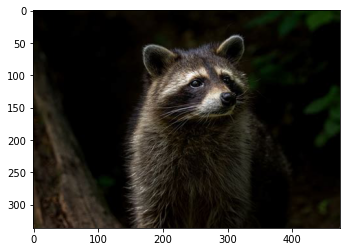

In [ ]:
from scipy import misc
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('racoon.jpg')

print(img.shape)
print(img.dtype)

plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
np.array(img).shape

(336, 474, 3)

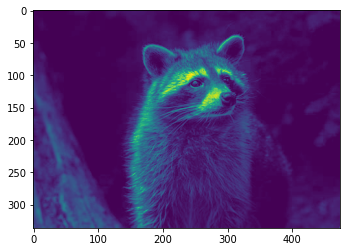

In [ ]:
plt.imshow(img[:,:,0])
plt.show()

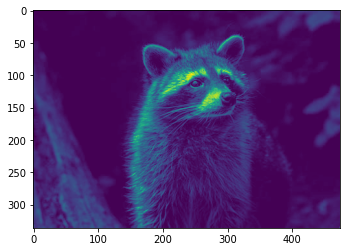

In [ ]:
plt.imshow(img[:,:,1])
plt.show()

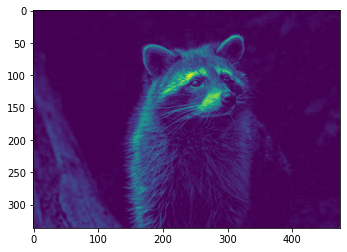

In [ ]:
plt.imshow(img[:,:,2])
plt.show()

# Pipelines de ejecución 2

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
# Definir el pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])


In [4]:
# Definir los hiperparámetros a probar
param_grid = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 10],
}

In [5]:
# Definir la métrica de evaluación
scoring = 'accuracy'

In [6]:
from sklearn.datasets import load_wine

wine = load_wine(return_X_y = False)

X = wine.data
y = wine.target

X.shape

(178, 13)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# Buscar el mejor modelo
grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring)
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo y su rendimiento
print("Mejor modelo: ", grid_search.best_estimator_)
print("Mejor rendimiento: ", grid_search.best_score_)

Mejor modelo:  Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=50))])
Mejor rendimiento:  0.976


In [ ]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [11]:
grid_search.best_params_

{'classifier': RandomForestClassifier(max_depth=5, n_estimators=50),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=3))])

In [16]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.072651,0.003441,0.003552,0.000474,"RandomForestClassifier(max_depth=5, n_estimato...",5,50,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.96,1.0,0.976,0.019596,1
7,0.148327,0.004961,0.005859,0.000229,"RandomForestClassifier(max_depth=5, n_estimato...",10,100,{'classifier': RandomForestClassifier(max_dept...,0.96,1.00,1.0,0.92,1.0,0.976,0.032000,1
1,0.160694,0.005580,0.006659,0.000988,"RandomForestClassifier(max_depth=5, n_estimato...",3,100,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
2,0.298644,0.012703,0.010949,0.001372,"RandomForestClassifier(max_depth=5, n_estimato...",3,200,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
4,0.222272,0.041793,0.009663,0.002512,"RandomForestClassifier(max_depth=5, n_estimato...",5,100,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
5,0.545731,0.180722,0.015163,0.003990,"RandomForestClassifier(max_depth=5, n_estimato...",5,200,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
6,0.075827,0.005229,0.003834,0.000934,"RandomForestClassifier(max_depth=5, n_estimato...",10,50,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
8,0.400372,0.155861,0.018737,0.010651,"RandomForestClassifier(max_depth=5, n_estimato...",10,200,{'classifier': RandomForestClassifier(max_dept...,0.96,0.96,1.0,0.92,1.0,0.968,0.029933,3
0,0.076885,0.002862,0.003803,0.000671,"RandomForestClassifier(max_depth=5, n_estimato...",3,50,{'classifier': RandomForestClassifier(max_dept...,0.92,0.96,1.0,0.92,1.0,0.960,0.035777,9


# Reshape

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_wine

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
wine = load_wine(return_X_y = False)

X_wine = wine.data
y_wine = wine.target

X_wine.shape

(178, 13)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_wine, y_wine)

RandomForestClassifier()

In [ ]:
import numpy as np
vector = np.random.rand(13)
vector, vector.shape

(array([0.62882833, 0.94505804, 0.23616974, 0.18811251, 0.00259863,
        0.5763938 , 0.15806621, 0.41498079, 0.45949541, 0.59147752,
        0.18245202, 0.98674063, 0.0640755 ]),
 (13,))

In [ ]:
rf.predict(vector)

ValueError: ignored

In [ ]:
matriz = vector.reshape([1, -1])
matriz.shape

(1, 13)

In [ ]:
rf.predict(vector)

array([1])

# TimeSeries Split and Pipelines

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_wine

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
wine = load_wine(return_X_y = False)

X_wine = wine.data
y_wine = wine.target

X_wine.shape

(178, 13)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA()),
    ('clf', RandomForestClassifier())
])

In [ ]:
parameters = {
    'scaler__feature_range': ((0,1), (-5,5)),      # Tamaño máximo del vocabulario (1000 y 2000).
    'pca__n_components': (2, 5, 10),   # Unigramas y unigramas + bigramas.
    'pca__svd_solver': ("full", "randomized"),         # Usar o no frecuencia inversa del documento.
    'clf__n_estimators': [50, 100],          # Número de árboles del Random Forest (50 y 100).
    'clf__max_features': [0.1, 0.3]          # Porcentaje de características del Random Forest (10% y 30%).
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
ts = TimeSeriesSplit()
list(ts.split(y_wine))

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
  array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
         50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
  array([62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
         79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 

In [ ]:
grid_cv = GridSearchCV(pipeline, param_grid = parameters, verbose=2, cv=ts.split(X_wine))
grid_cv.fit(X_wine, y_wine)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(0, 1); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_components=2, pca__svd_solver=full, scaler__feature_range=(-5, 5); total time=   0.1s
[CV] END clf__max_features=0.1, clf__n_estimators=50, pca__n_

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f1134f90510>,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_features': [0.1, 0.3],
                         'clf__n_estimators': [50, 100],
                         'pca__n_components': (2, 5, 10),
                         'pca__svd_solver': ('full', 'randomized'),
                         'scaler__feature_range': ((0, 1), (-5, 5))},
             verbose=2)

In [ ]:
grid_cv.best_params_

{'clf__max_features': 0.1,
 'clf__n_estimators': 100,
 'pca__n_components': 2,
 'pca__svd_solver': 'full',
 'scaler__feature_range': (0, 1)}

In [ ]:
grid_cv.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('clf', RandomForestClassifier(max_features=0.1))])

In [ ]:
estimtadores = [('Paso_Uno_Inventado', Paso1()), ('Paso2', Paso2()), ('Paso3', Paso3())]

In [ ]:
# Pipeline con los tres estimadores a utilizar.

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

In [ ]:
parameters = {
    'vect__max_features': (1000, 2000),      # Tamaño máximo del vocabulario (1000 y 2000).
    'vect__ngram_range': ((1, 1), (1, 2)),   # Unigramas y unigramas + bigramas.
    'tfidf__use_idf': (True, False),         # Usar o no frecuencia inversa del documento.
    'clf__n_estimators': [50, 100],          # Número de árboles del Random Forest (50 y 100).
    'clf__max_features': [0.1, 0.3]          # Porcentaje de características del Random Forest (10% y 30%).
}